In [2]:
library(ggplot2)
library(openxlsx)
library(tidyverse)
library(reshape)

In [3]:
context.color = c('context1'='#15C4C8','context2'='#7CAE02','context3'='#F98880')
variable.color = c("anger"="#E40615","disgust"="#8E77AE","fear"="#01973F",
                    "happy"="#F3CF0E","sad"="#2C82C5","surprised"="#FA8B2B",
                    "neutral"="#7F7F7F")

In [4]:
plot = function(character){
    character_melt = melt(character,id.vars=('context'))
    colnames(character_melt)[1] <- c("context")
    character_melt$'context'=factor(character_melt$'context')
    # Set a number of 'empty bar' to add at the end of each group
    empty_bar <- 4
    to_add <- data.frame(
      variable = rep(NA, empty_bar * nlevels(character_melt$context)),
      context = rep(levels(character_melt$context), each = empty_bar),
      value = rep(NA, empty_bar * nlevels(character_melt$context))
    )
    data <- rbind(character_melt, to_add)


    data <- data %>% arrange(context)
    data$'id' = seq(1, nrow(data))
    head(data)

    options(repr.plot.width=15,repr.plot.height=15)

    # Get the name and the y position of each label
    label_data <- data
    number_of_bar <- nrow(label_data)
    angle <- 90 - 360 * (label_data$id-0.5) /number_of_bar   
    label_data$hjust <- ifelse( angle < -90, 1, 0)
    label_data$angle <- ifelse(angle < -90, angle+180, angle)


    ggplot(data, aes(x=as.factor(id), y=value, color=context,fill=variable)) +  
      geom_bar(stat="identity", alpha=0.5,size=2) +
      scale_color_manual(values=context.color) + 
      scale_fill_manual(values=variable.color)+
      ylim(-100,100) +
      theme_minimal() +
      theme(
        legend.position = "none",
        axis.text = element_blank(),
        axis.title = element_blank(),
        panel.grid = element_blank(),
        plot.margin = unit(rep(-1,4), "cm") 
      ) +
      coord_polar()+
      geom_text(data=label_data, aes(x=id, y=value+10, label=variable, hjust=hjust), 
                color="black", fontface="bold",alpha=0.6, size=7, 
                angle= label_data$angle, inherit.aes = FALSE )
    }

,context,anger,disgust,fear,happy,sad,surprised,neutral
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,context1,18.18182,0,0,12.12121,66.66667,0,3.030303
2,context2,90.00000,0,0,0.00000,10.00000,0,0.000000
3,context3,0.00000,0,0,0.00000,0.00000,0,100.000000


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"Removed 12 rows containing missing values (`position_stack()`)."
Warning message:
"Removed 13 rows containing missing values (`geom_text()`)."
Warning message:
"Removed 12 rows containing missing values (`position_stack()`)."
Warning message:
"Removed 13 rows containing missing values (`geom_text()`)."


png 
  2

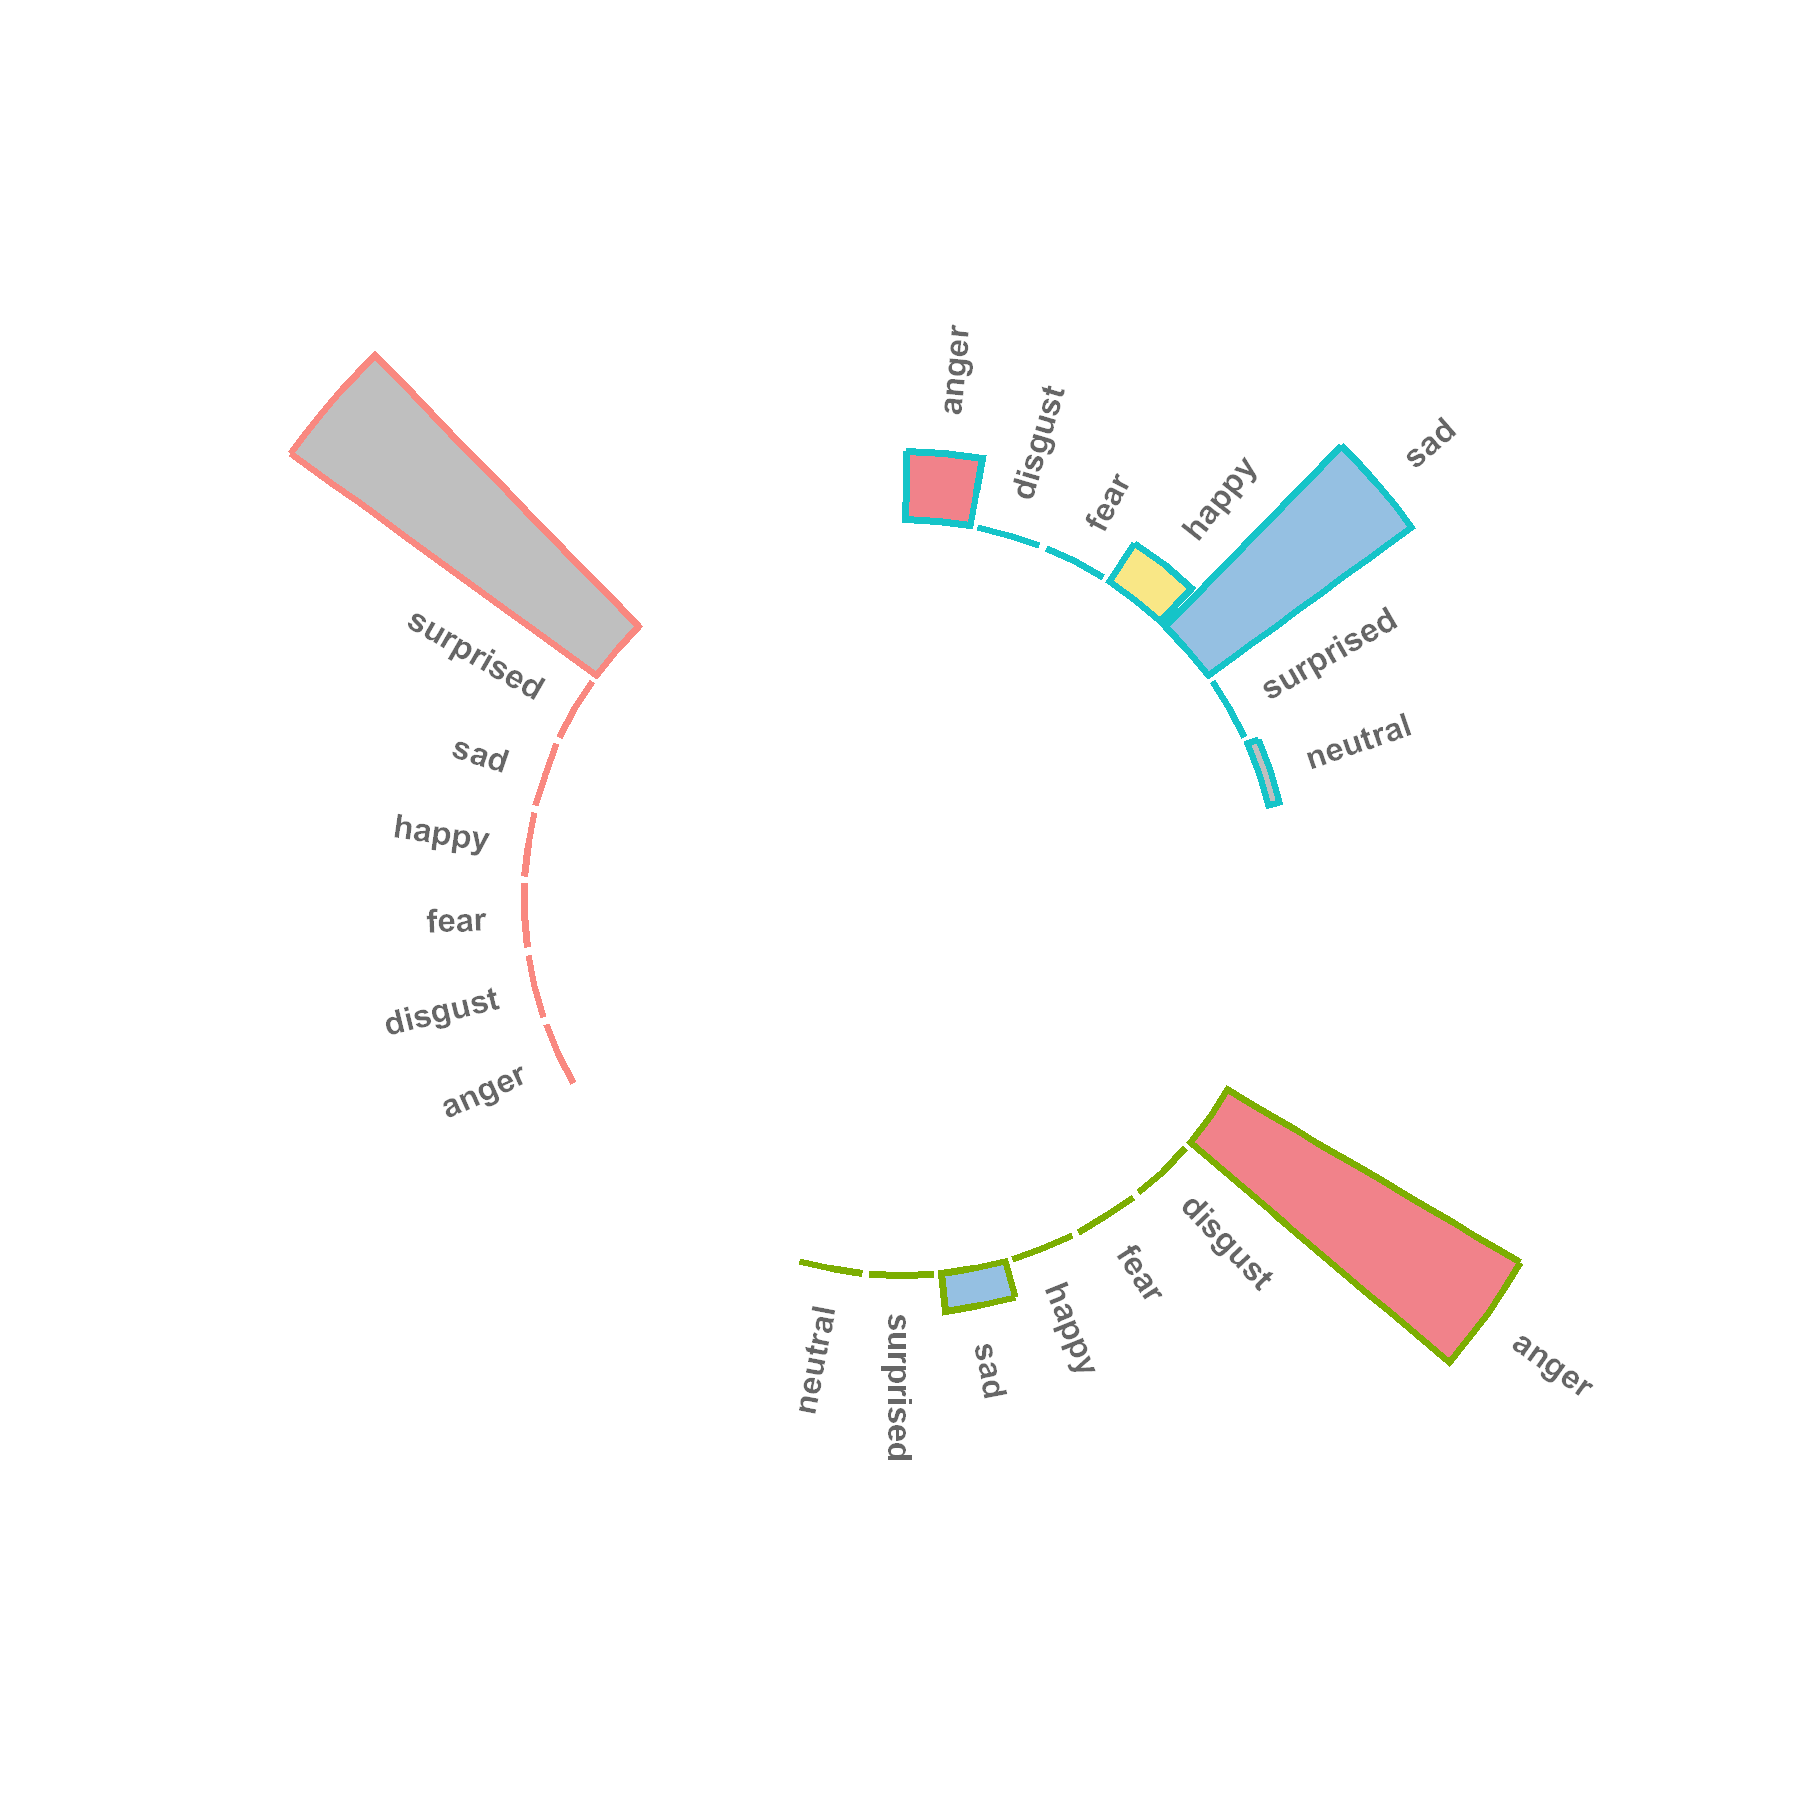

In [5]:
child1 = read.xlsx('Character_Context.xlsx',sheet='Raju')
colnames(child1)[1] <- c("context")
child1
plot(child1)
png("output_graph/Raju.png", bg="transparent",
    family = 'sans',units='in',width=10,height=10,res=150)
plot(child1)
dev.off()